In [1]:
!pip install ultralytics
# Check GPU
!nvidia-smi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [2]:
!unzip /content/Dataset-20250707T043520Z-1-001.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Classification/tray/empty/00000002190000000_frame39600_jpg.rf.738797516f4004c84633d12073a0bcbd_4_522.jpg  
  inflating: Dataset/Classification/tray/not_empty/00000001351000000_frame57600_jpg.rf.1fd1f471de220c12004103545b756202_4_460.jpg  
  inflating: Dataset/Detection/train/images/img_000723.jpg  
  inflating: Dataset/Classification/tray/not_empty/00000001114000000_frame43800_jpg.rf.27b122a11b8a091d15cc32c1d16ad861_4_438.jpg  
  inflating: Dataset/Classification/dish/kakigori/crop_1574_jpg.rf.a90f2383d496d175326b6e261d6df2de_5_657.jpg  
  inflating: Dataset/Classification/tray/empty/00000002191000000_frame67500_jpg.rf.bc29fa1b62440d0677ac9976056b918f_4_753.jpg  
  inflating: Dataset/Classification/tray/empty/00000002190000000_frame74100_jpg.rf.af45115dc42aac89dfe26f65aa44b6c6_4_612.jpg  
  inflating: Dataset/Classification/dish/kakigori/crop_0642_jpg.rf.6b5478039d1cd6b6d15359e56b6cea33_5_158.jpg  
  inflating: Dat

# Build detection model

In [5]:
from ultralytics import YOLO

# Load YOLOv11 nano model
model = YOLO('yolo11n.pt')

# Training the detection model
results = model.train(
    data='/content/Dataset/Detection/dataset.yaml',
    epochs=100,
    imgsz=640,
    batch=16,
    device=0  # using GPU
)

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Dataset/Detection/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, 

train: Scanning /content/Dataset/Detection/train/labels... 1040 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1040/1040 [00:00<00:00, 2407.49it/s]

train: New cache created: /content/Dataset/Detection/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 489.2±280.7 MB/s, size: 41.0 KB)


val: Scanning /content/Dataset/Detection/val/labels... 261 images, 0 backgrounds, 0 corrupt: 100%|██████████| 261/261 [00:00<00:00, 2037.52it/s]

val: New cache created: /content/Dataset/Detection/val/labels.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.38G     0.8895      2.122       1.15         30        640: 100%|██████████| 65/65 [00:20<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]

                   all        261        374      0.928      0.211      0.655      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.78G     0.8473      1.224      1.078         49        640: 100%|██████████| 65/65 [00:17<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]

                   all        261        374      0.919      0.853      0.942      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.79G      0.851      1.079      1.082         50        640: 100%|██████████| 65/65 [00:18<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.61it/s]

                   all        261        374      0.687      0.752      0.792      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       2.8G     0.8574     0.9804      1.095         53        640: 100%|██████████| 65/65 [00:17<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.33it/s]

                   all        261        374      0.859       0.76      0.908      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.82G     0.8169     0.8874      1.076         47        640: 100%|██████████| 65/65 [00:18<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]

                   all        261        374      0.865      0.918      0.948       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.84G     0.8079      0.808       1.06         57        640: 100%|██████████| 65/65 [00:17<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        261        374       0.92      0.909      0.961      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.85G     0.7705     0.7373      1.034         40        640: 100%|██████████| 65/65 [00:17<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.45it/s]

                   all        261        374      0.918       0.93      0.973       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.87G      0.764      0.701      1.051         36        640: 100%|██████████| 65/65 [00:19<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.21it/s]

                   all        261        374      0.994      0.977      0.991      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.88G     0.7552     0.6608      1.035         49        640: 100%|██████████| 65/65 [00:17<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.37it/s]

                   all        261        374      0.933      0.914      0.972       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.89G     0.7485       0.64      1.035         50        640: 100%|██████████| 65/65 [00:18<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]

                   all        261        374      0.929      0.936      0.982      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.91G     0.7483     0.6136      1.029         36        640: 100%|██████████| 65/65 [00:17<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]

                   all        261        374       0.98      0.976      0.991      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.92G     0.7292     0.6025      1.023         42        640: 100%|██████████| 65/65 [00:17<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.18it/s]

                   all        261        374      0.855      0.891      0.964      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.94G     0.7065     0.5631      1.021         40        640: 100%|██████████| 65/65 [00:18<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.22it/s]

                   all        261        374      0.955      0.971      0.983      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.95G     0.7061     0.5722      1.009         59        640: 100%|██████████| 65/65 [00:18<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.92it/s]

                   all        261        374      0.981      0.979      0.987      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.97G     0.7039     0.5471       1.01         38        640: 100%|██████████| 65/65 [00:17<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.38it/s]

                   all        261        374      0.997      0.971      0.988      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.98G     0.6931     0.5354      1.006         43        640: 100%|██████████| 65/65 [00:19<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.88it/s]

                   all        261        374      0.979      0.963      0.988      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         3G     0.6948     0.5381          1         47        640: 100%|██████████| 65/65 [00:17<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.39it/s]

                   all        261        374      0.971      0.966       0.99      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.02G     0.6722     0.5319      0.991         45        640: 100%|██████████| 65/65 [00:19<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]

                   all        261        374      0.993      0.966      0.989      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.03G     0.6724     0.5071     0.9994         39        640: 100%|██████████| 65/65 [00:17<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.10it/s]

                   all        261        374      0.969      0.984      0.992      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.04G     0.6426      0.493     0.9843         57        640: 100%|██████████| 65/65 [00:17<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.46it/s]

                   all        261        374      0.954      0.969      0.984      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.06G     0.6521     0.5034     0.9985         42        640: 100%|██████████| 65/65 [00:18<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.44it/s]

                   all        261        374      0.989      0.984      0.994      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.07G     0.6595     0.5031     0.9932         42        640: 100%|██████████| 65/65 [00:17<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]

                   all        261        374      0.988      0.976      0.987      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.09G     0.6576     0.4906     0.9948         34        640: 100%|██████████| 65/65 [00:18<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.46it/s]

                   all        261        374      0.987      0.966       0.99      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       3.1G     0.6406     0.4721     0.9831         58        640: 100%|██████████| 65/65 [00:17<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.26it/s]

                   all        261        374      0.991      0.983      0.994       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.12G     0.6591     0.4687     0.9969         54        640: 100%|██████████| 65/65 [00:17<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.19it/s]

                   all        261        374      0.994      0.985      0.991      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.13G     0.6284     0.4624     0.9829         39        640: 100%|██████████| 65/65 [00:18<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]

                   all        261        374      0.987      0.984      0.989      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.15G     0.6216     0.4584     0.9764         44        640: 100%|██████████| 65/65 [00:17<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        261        374      0.994      0.971      0.986      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.16G     0.6386     0.4582     0.9754         71        640: 100%|██████████| 65/65 [00:18<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.28it/s]

                   all        261        374      0.994      0.973      0.985      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.18G     0.6317     0.4463     0.9786         57        640: 100%|██████████| 65/65 [00:19<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.56it/s]

                   all        261        374      0.997      0.979       0.99      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.19G     0.6327     0.4525     0.9831         53        640: 100%|██████████| 65/65 [00:18<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.23it/s]

                   all        261        374       0.99      0.981      0.987      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.21G     0.6443     0.4657       0.99         48        640: 100%|██████████| 65/65 [00:19<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.37it/s]

                   all        261        374      0.996      0.976      0.987      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.22G     0.6267     0.4435     0.9718         38        640: 100%|██████████| 65/65 [00:18<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.16it/s]

                   all        261        374      0.997      0.981      0.988      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.24G     0.6061     0.4399     0.9793         38        640: 100%|██████████| 65/65 [00:17<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.44it/s]

                   all        261        374       0.99      0.979      0.989      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.25G     0.5977     0.4331     0.9623         39        640: 100%|██████████| 65/65 [00:18<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.00it/s]

                   all        261        374      0.982      0.971      0.987      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.27G     0.6084      0.435     0.9719         45        640: 100%|██████████| 65/65 [00:17<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.82it/s]

                   all        261        374      0.995      0.978      0.989      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.28G     0.5952     0.4215     0.9675         36        640: 100%|██████████| 65/65 [00:17<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.29it/s]

                   all        261        374      0.998       0.98      0.989      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.29G      0.602      0.418     0.9631         51        640: 100%|██████████| 65/65 [00:17<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.29it/s]

                   all        261        374       0.99      0.977      0.988      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.31G        0.6     0.4199     0.9667         64        640: 100%|██████████| 65/65 [00:17<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.49it/s]

                   all        261        374      0.993      0.976      0.989      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.32G     0.5939     0.4169     0.9615         41        640: 100%|██████████| 65/65 [00:18<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.00it/s]

                   all        261        374      0.992      0.986      0.988      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.34G     0.5949     0.4144     0.9609         35        640: 100%|██████████| 65/65 [00:17<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.63it/s]

                   all        261        374      0.993      0.983      0.989      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.35G     0.5974     0.4126     0.9646         34        640: 100%|██████████| 65/65 [00:17<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.40it/s]

                   all        261        374      0.999      0.982      0.989      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.37G      0.575     0.4026     0.9549         45        640: 100%|██████████| 65/65 [00:17<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.03it/s]

                   all        261        374      0.997      0.979       0.99      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.38G      0.578     0.4022      0.965         48        640: 100%|██████████| 65/65 [00:17<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.29it/s]

                   all        261        374       0.99      0.984       0.99      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       3.4G     0.5801     0.3973     0.9603         45        640: 100%|██████████| 65/65 [00:18<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.18it/s]

                   all        261        374      0.997      0.984      0.986       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.41G      0.586     0.3937     0.9592         50        640: 100%|██████████| 65/65 [00:17<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.33it/s]

                   all        261        374      0.995      0.976      0.991      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.43G     0.5865     0.3948      0.963         37        640: 100%|██████████| 65/65 [00:18<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]

                   all        261        374      0.995      0.975       0.99      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.44G     0.5767     0.4006     0.9553         51        640: 100%|██████████| 65/65 [00:18<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.30it/s]

                   all        261        374      0.992      0.984       0.99      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.46G     0.5722     0.3907     0.9534         33        640: 100%|██████████| 65/65 [00:17<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.33it/s]

                   all        261        374      0.998      0.981      0.989      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.47G     0.5791      0.387     0.9543         48        640: 100%|██████████| 65/65 [00:18<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]

                   all        261        374      0.991      0.986      0.991      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.49G     0.5621     0.3828      0.954         47        640: 100%|██████████| 65/65 [00:18<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.01it/s]

                   all        261        374      0.999      0.985      0.988      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       3.5G     0.5533     0.3792     0.9489         42        640: 100%|██████████| 65/65 [00:17<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.39it/s]

                   all        261        374      0.992      0.982      0.988      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.52G     0.5525     0.3732     0.9526         43        640: 100%|██████████| 65/65 [00:17<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.51it/s]

                   all        261        374      0.995      0.984      0.986      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.53G     0.5432     0.3699     0.9468         50        640: 100%|██████████| 65/65 [00:17<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.62it/s]

                   all        261        374      0.994      0.982      0.989      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.55G     0.5622     0.3786     0.9468         42        640: 100%|██████████| 65/65 [00:18<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]

                   all        261        374      0.995      0.989      0.994      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.56G      0.549     0.3668     0.9466         42        640: 100%|██████████| 65/65 [00:17<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        261        374      0.997      0.984       0.99      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.58G      0.544     0.3607     0.9396         39        640: 100%|██████████| 65/65 [00:18<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.47it/s]

                   all        261        374      0.999      0.981      0.988      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.59G     0.5624     0.3609     0.9561         44        640: 100%|██████████| 65/65 [00:17<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.15it/s]

                   all        261        374      0.994      0.984      0.988      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.61G     0.5567     0.3579     0.9519         40        640: 100%|██████████| 65/65 [00:17<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.23it/s]

                   all        261        374      0.993      0.981      0.991      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.62G     0.5422     0.3568     0.9415         35        640: 100%|██████████| 65/65 [00:18<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.24it/s]

                   all        261        374          1      0.979      0.991      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.63G     0.5385     0.3521      0.937         34        640: 100%|██████████| 65/65 [00:17<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.27it/s]

                   all        261        374      0.996      0.986      0.991      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.65G     0.5452     0.3579     0.9522         58        640: 100%|██████████| 65/65 [00:19<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.38it/s]

                   all        261        374      0.993      0.981       0.99      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.67G     0.5372     0.3544     0.9392         46        640: 100%|██████████| 65/65 [00:17<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.37it/s]

                   all        261        374      0.995      0.985      0.991      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.68G     0.5309      0.352      0.941         51        640: 100%|██████████| 65/65 [00:17<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.18it/s]

                   all        261        374      0.999      0.989      0.991      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.69G     0.5309     0.3438     0.9385         43        640: 100%|██████████| 65/65 [00:18<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.12it/s]

                   all        261        374      0.999      0.989       0.99      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.71G     0.5307     0.3474      0.937         23        640: 100%|██████████| 65/65 [00:17<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]

                   all        261        374      0.999      0.989      0.992      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.72G      0.529      0.344     0.9324         53        640: 100%|██████████| 65/65 [00:18<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.35it/s]

                   all        261        374      0.999      0.979       0.99      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.74G     0.5269     0.3466     0.9408         52        640: 100%|██████████| 65/65 [00:17<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.10it/s]

                   all        261        374      0.988      0.987      0.991      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.75G     0.5276     0.3468     0.9386         59        640: 100%|██████████| 65/65 [00:17<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.60it/s]

                   all        261        374          1      0.983      0.991      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.77G      0.524     0.3431     0.9347         63        640: 100%|██████████| 65/65 [00:18<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]

                   all        261        374      0.996      0.991      0.991      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.78G     0.5142     0.3353     0.9308         54        640: 100%|██████████| 65/65 [00:17<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.49it/s]

                   all        261        374      0.997      0.987      0.991      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       3.8G     0.5158     0.3249     0.9368         35        640: 100%|██████████| 65/65 [00:18<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.39it/s]

                   all        261        374      0.999      0.989      0.991      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.81G     0.5085     0.3322      0.934         36        640: 100%|██████████| 65/65 [00:17<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.57it/s]

                   all        261        374      0.989      0.989      0.991      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.83G     0.5037     0.3179     0.9258         45        640: 100%|██████████| 65/65 [00:18<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.35it/s]

                   all        261        374      0.999      0.982       0.99      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.84G     0.4982     0.3191     0.9197         49        640: 100%|██████████| 65/65 [00:18<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.52it/s]

                   all        261        374      0.998      0.984       0.99      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.86G     0.5097     0.3238     0.9253         50        640: 100%|██████████| 65/65 [00:17<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.30it/s]

                   all        261        374          1      0.987      0.991      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.87G     0.5116     0.3246     0.9329         42        640: 100%|██████████| 65/65 [00:18<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]

                   all        261        374          1      0.989      0.992      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.89G     0.4941     0.3152     0.9228         59        640: 100%|██████████| 65/65 [00:18<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.96it/s]

                   all        261        374          1      0.985      0.991      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       3.9G     0.5085     0.3155     0.9325         37        640: 100%|██████████| 65/65 [00:17<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.43it/s]

                   all        261        374      0.999      0.983      0.991      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.92G     0.4967     0.3118     0.9233         57        640: 100%|██████████| 65/65 [00:19<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.22it/s]

                   all        261        374      0.998      0.989      0.991      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.93G     0.4995     0.3173     0.9279         42        640: 100%|██████████| 65/65 [00:17<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.03it/s]

                   all        261        374          1      0.989      0.991      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.95G     0.4813     0.3022     0.9126         37        640: 100%|██████████| 65/65 [00:18<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.41it/s]

                   all        261        374          1       0.99      0.991      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.96G     0.4973     0.3083     0.9216         41        640: 100%|██████████| 65/65 [00:17<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.03it/s]

                   all        261        374      0.998      0.989      0.991      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.97G     0.4849     0.3038     0.9152         31        640: 100%|██████████| 65/65 [00:18<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.54it/s]

                   all        261        374          1      0.988      0.991      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.99G     0.4825     0.3017     0.9151         55        640: 100%|██████████| 65/65 [00:20<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.47it/s]

                   all        261        374      0.997       0.99      0.991      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.01G     0.4836     0.3042     0.9193         39        640: 100%|██████████| 65/65 [00:17<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.30it/s]


                   all        261        374      0.998      0.988      0.992      0.922

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.02G     0.4785     0.2941     0.9198         46        640: 100%|██████████| 65/65 [00:17<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.57it/s]

                   all        261        374      0.999      0.992      0.992      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.04G     0.4916     0.3025     0.9244         40        640: 100%|██████████| 65/65 [00:18<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        261        374      0.997       0.99      0.991      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.05G     0.4827     0.2971      0.919         40        640: 100%|██████████| 65/65 [00:17<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.34it/s]

                   all        261        374          1      0.989      0.991      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.06G     0.4861     0.2981     0.9221         47        640: 100%|██████████| 65/65 [00:18<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.22it/s]

                   all        261        374      0.999      0.989      0.991      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.08G     0.4656     0.2823     0.9106         49        640: 100%|██████████| 65/65 [00:17<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.32it/s]

                   all        261        374          1      0.989      0.991      0.922


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.09G     0.4002     0.2361     0.8861         19        640: 100%|██████████| 65/65 [00:18<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.44it/s]

                   all        261        374      0.994      0.989      0.991      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.11G     0.3922     0.2315     0.8782         23        640: 100%|██████████| 65/65 [00:17<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.85it/s]

                   all        261        374      0.997      0.988      0.991      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.12G     0.3877      0.228     0.8783         22        640: 100%|██████████| 65/65 [00:17<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.33it/s]

                   all        261        374      0.996      0.987      0.991      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.14G     0.3794     0.2243     0.8717         24        640: 100%|██████████| 65/65 [00:17<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.77it/s]

                   all        261        374      0.997      0.983      0.991       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.15G     0.3811     0.2254       0.87         33        640: 100%|██████████| 65/65 [00:17<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.18it/s]

                   all        261        374      0.995      0.988      0.991      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.17G      0.378     0.2251     0.8699         31        640: 100%|██████████| 65/65 [00:18<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.50it/s]

                   all        261        374      0.995      0.989      0.991      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.18G     0.3675     0.2164     0.8638         20        640: 100%|██████████| 65/65 [00:16<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.60it/s]


                   all        261        374      0.994      0.989      0.991      0.921

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       4.2G     0.3724     0.2195     0.8687         30        640: 100%|██████████| 65/65 [00:17<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.53it/s]

                   all        261        374          1      0.986      0.991      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.21G     0.3734     0.2155     0.8648         28        640: 100%|██████████| 65/65 [00:16<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]


                   all        261        374      0.998      0.984      0.991      0.925

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.23G     0.3713     0.2158     0.8745         23        640: 100%|██████████| 65/65 [00:17<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.70it/s]

                   all        261        374      0.998      0.984      0.991      0.923



100 epochs completed in 0.580 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.19it/s]


                   all        261        374      0.998      0.984      0.991      0.925
                  dish        131        175          1      0.989      0.995      0.934
                  tray        180        199      0.997       0.98      0.988      0.916
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/train3


In [ ]:
# Validate the trained model
metrics = model.val()

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1232.4±462.5 MB/s, size: 39.6 KB)


val: Scanning /content/Dataset/Detection/val/labels.cache... 261 images, 0 backgrounds, 0 corrupt: 100%|██████████| 261/261 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:19<00:00,  1.15s/it]


                   all        261        374      0.971      0.976      0.992      0.864
                  dish        131        175      0.952      0.983       0.99      0.888
                  tray        180        199       0.99       0.97      0.993      0.839
Speed: 19.5ms preprocess, 16.6ms inference, 0.0ms loss, 11.7ms postprocess per image
Results saved to runs/detect/train22



image 1/1 /content/Dataset/Detection/val/images/img_000009.jpg: 1280x1280 1 dish, 1 tray, 21.3ms
Speed: 9.6ms preprocess, 21.3ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


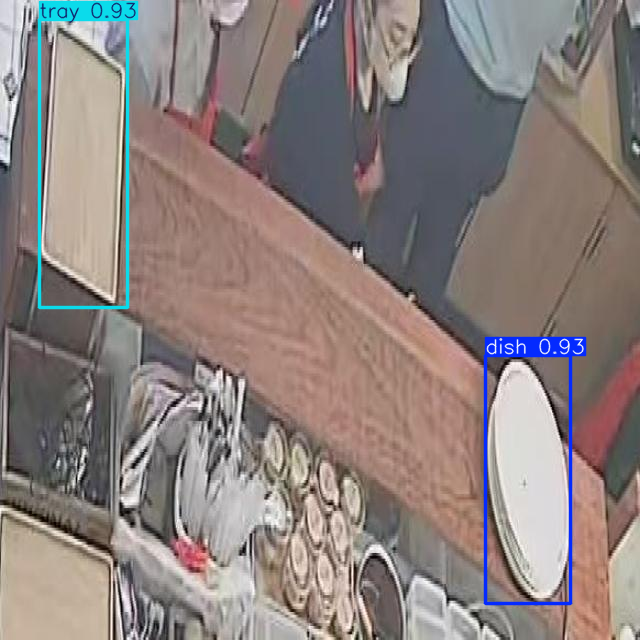

In [ ]:
# Run prediction on a test image
results = model.predict('/content/Dataset/Detection/val/images/img_000009.jpg', conf=0.5)

# Display the results
results[0].show()


image 1/1 /content/Dataset/Detection/val/images/img_000046.jpg: 1280x1280 2 dishs, 1 tray, 21.4ms
Speed: 16.3ms preprocess, 21.4ms inference, 1.9ms postprocess per image at shape (1, 3, 1280, 1280)


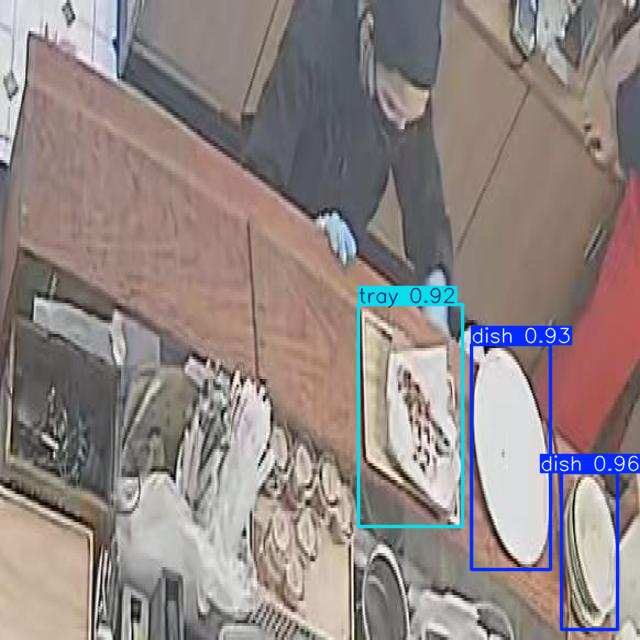

In [ ]:
results_2 = model.predict('/content/Dataset/Detection/val/images/img_000046.jpg', conf=0.5)

# Display the results
results_2[0].show()

In [ ]:
from google.colab import files
files.download('/content/runs/detect/train2/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('/content/runs/detect/train2/weights/last.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('/content/runs/detect/train2')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Build classification model

In [ ]:
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Dataset path
data_dir = '/content/Dataset/Classification'

# Classes
class_names = ['empty', 'kakigori', 'not_empty']

# Create lists to store file paths and labels
file_paths = []
labels = []

# Walk through dish and tray folders
for item_type in ['dish', 'tray']:
    item_path = os.path.join(data_dir, item_type)
    for status in os.listdir(item_path):
        status_path = os.path.join(item_path, status)
        for image_name in os.listdir(status_path):
            file_paths.append(os.path.join(status_path, image_name))
            labels.append(class_names.index(status))  # convert label to integer

print(f"Total samples: {len(file_paths)}")


Total samples: 2914


In [ ]:
train_paths, val_paths, train_labels, val_labels = train_test_split(
    file_paths, labels, test_size=0.2, random_state=42, stratify=labels)

print(f"Training samples: {len(train_paths)}")
print(f"Validation samples: {len(val_paths)}")


Training samples: 2331
Validation samples: 583


In [ ]:
# Helper function to load and preprocess image
def process_image(file_path, label):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [224, 224])
    img = img / 255.0  # Normalize to [0, 1]
    return img, label

# Build TensorFlow dataset
train_ds = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
train_ds = train_ds.map(process_image).batch(32).shuffle(buffer_size=1000)

val_ds = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
val_ds = val_ds.map(process_image).batch(32)


In [ ]:
from tensorflow.keras import layers, models, applications

# Load pre-trained MobileNetV2
base_model = applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Build classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # 3 classes: empty, kakigori, not_empty
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
epochs = 10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.6814 - loss: 0.7870 - val_accuracy: 0.9108 - val_loss: 0.2627
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.8866 - loss: 0.2957 - val_accuracy: 0.9400 - val_loss: 0.2074
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.9244 - loss: 0.2126 - val_accuracy: 0.9348 - val_loss: 0.1968
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.9317 - loss: 0.1800 - val_accuracy: 0.9331 - val_loss: 0.1821
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.9483 - loss: 0.1512 - val_accuracy: 0.9485 - val_loss: 0.1660
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.9597 - loss: 0.1322 - val_accuracy: 0.9383 - val_loss: 0.1714
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.9507 - loss: 0.1456 - val_accuracy: 0.9417 - val_loss: 0.1727
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.9596 - loss: 0.1179 - val_accuracy: 0.9451 - v

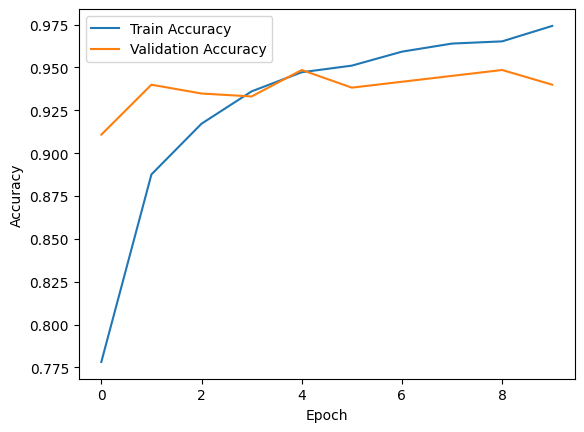

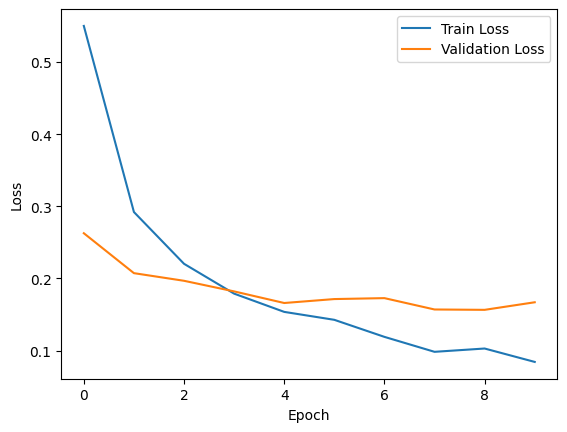

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
loss, accuracy = model.evaluate(val_ds)
print(f'Validation accuracy: {accuracy * 100:.2f}%')

19/19 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9523 - loss: 0.1393
Validation accuracy: 94.00%


In [ ]:
model.save('/content/drive/MyDrive/classification_model.h5')

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/classification_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save('/content/drive/MyDrive/classification_model.h5')